<span style="color:#00000; font-family: 'Bebas Neue'; font-size: 2.25em;">**Finding Descriptive Statistics in American Brewery and Beer Data**</span>

<span style="color:#00000;; font-family: 'Bebas Neue'; font-size: 1.25em;">**by: Pritpal Bhangu, Sean Bernard, Andre Loukrezis & Bridget Weill**</span>






<img src =  'https://cdn.pixabay.com/photo/2016/07/13/01/01/beer-1513436_960_720.jpg' width="800" height="800" />

##### *Source: Pixabay*

# Project Objective


In this project, we looked at United States brewery and beer data to determine multiple descriptive statistics such as which states have the most breweries, which breweries produce the beers with the highest ABV, etc.


### Questions to Answer

- Which state has the highest number of breweries? 
- Which city has the highest number of breweries? 
- Which breweries serve the beers with the highest alcohol content?


- Which is the most popular beer style in US? 
- What is the average alcohol content by brand?
- What is the average alcohol content by beer type?
- What is the average alcohol content by state?

- What is the most popular beer in Connecticut?
- What is the average alcohol content of beers in Connecticut?
- How many breweries are there in Connecticut?


### Data Source

The data used in this project comes from the following: 

- Brewery and Beer Types Data - https://www.kaggle.com/nickhould/craft-cans
- Census Region Classifications Data - 




### Glossary

**ABV:** 

*Alcohol by volume*, a standard measure of how much alcohol (ethanol) is contained in a given volume of an alcoholic beverage (expressed as a volume percent).It is defined as the number of millilitres (mL) of pure ethanol present in 100 mL (3.4 fl. oz) of solution at 20 °C (68 °F). The number of millilitres of pure ethanol is the mass of the ethanol divided by its density at 20 °C, which is 0.78924 g/mL (105.3 fl oz/gallon). (Wikipedia)

**Pandas:** 
is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

**Numpy:** 
is the fundamental package for scientific computing with Python. It contains among other things:

a powerful N-dimensional array object

sophisticated (broadcasting) functions

tools for integrating C/C++ and Fortran code

useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

**Matplotlib:**
is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

Python’s fundamental plotting library (pg. 50 Pandas Textbook)

**Seaborn:**  

a library that builds on matplotlib by providing a higher-level interface for statistical graphics. It provides an interface to produce prettier and more complex visualizations with fewer lines of code.

The seaborn library is tightly integrated with Pandas and the rest of the PyData stack (numpy, scipy, statsmodels), making visualizations from any part of the data analysis process a breeze. Since seaborn is built on top of matplotlib, the user still has the ability to fine-tune the visualizations. (pg. 61 Pandas Textbook)


### Data Dictionary

| Column | Definition | 
| ------------ | ---------- | 
| Unnamed | Row number |
| abv | The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol |
| ibu | International bittering units, which describe how bitter a drink is. |
| id | Unique ID |
| name | Name of the beer. |
| style | Beer style (lager, pale ale, IPA, etc.) |
| brewery_id | Unique identifier for brewery that produces this beer; can use to join with brewery info. |
| ounces | Size of beer in ounces. |
| name | Name of the brewery |
| city | City that the brewery is located in. |
| state | State that the brewery is located in.|
|city, state| City and State that the brewery is located in. |
| Points | Wine Spectator tasters review wines on a 100-point scale (see below) |
| Designation | A vineyard designated wine is a wine produced from the product of a single vineyard with that vineyard's name appearing on the wine label |



  #### Wine Points Scale: 
| Points | Explanation | 
| ------------ | ---------- | 
| 95-100 | Classic: a great wine | 
| 90-94  | Outstanding: a wine of superior character and style |
| 85-89 | Very good: a wine with special qualities |
| 80-84 | Good: a solid, well-made wine |
| 75-79 | Mediocre: a drinkable wine that may have minor flaws |
| 50-74 | Not recommended |


### Import Data

In [3]:
# Import all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from numpy import median

# Upload csv files into dataframes.

beers_df = pd.read_csv('beers.csv') 
breweries_df = pd.read_csv('breweries.csv') 
winery_df = pd.read_csv('winery.csv',delimiter=';')
uswinery_df = pd.read_csv('uswinery.csv')
    # delimiter=';' because the data is seperated by ;

### **Data Check and Cleanup**

##### Before proceding with finding any insights from the data sets, we must first look at the integrity of the data, see how much data we are working with, the size and datatypes within the data, if there are any null values, and if so remove or replace them within the dataframe.

In [4]:
beers_df
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [5]:
breweries_df
breweries_df.head()

,ID,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [6]:
winery_df
winery_df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,"last_year_points,,"
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,"94,,"
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,"92,,"
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,"100,,"
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,"94,,"
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,"94,,"


In [7]:
uswinery_df
uswinery_df.head()

,Winery Name,State,Web Site
0,14 Hands,WA,www.14handswine.com
1,Abacela Vineyards & Winery,OR,www.abacela.com
2,Abarbanel Wine Co.,NY,www.kosher-wine.com
3,Abbott Winery,CA,www.abbottwinery.com
4,Abeja,WA,www.abeja.net


In [8]:
# Check how much data were working with

beers_df.info()
beers_df.shape 

# 2410 rows, 8 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
Unnamed: 0    2410 non-null int64
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
name          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


(2410, 8)

In [9]:
breweries_df.info()
breweries_df.shape 

# 558 rows, 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
ID       558 non-null int64
name     558 non-null object
city     558 non-null object
state    558 non-null object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


(558, 4)

In [10]:
winery_df.info()
winery_df.shape 

# 144037 rows, 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144037 entries, 0 to 144036
Data columns (total 10 columns):
country               144035 non-null object
designation           100208 non-null object
points                144029 non-null float64
price                 130638 non-null float64
province              144027 non-null object
region_1              120189 non-null object
region_2              58375 non-null object
variety               144029 non-null object
winery                144029 non-null object
last_year_points,,    144034 non-null object
dtypes: float64(2), object(8)
memory usage: 11.0+ MB


(144037, 10)

In [11]:
uswinery_df.info()
uswinery_df.shape

# 2900 rows, 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 3 columns):
Winery Name    2900 non-null object
State          2900 non-null object
Web Site       2482 non-null object
dtypes: object(3)
memory usage: 68.1+ KB


(2900, 3)

In [12]:
# We first use .isna().any to check if there are any null values in the data set.

beers_df.isna().any()

# We have found that the "abv", "ibu" and "style" categories all have True values, meaning that they have null data 
# in their columns.

Unnamed: 0    False
abv            True
ibu            True
id            False
name          False
style          True
brewery_id    False
ounces        False
dtype: bool

In [13]:
# After checking for any missing value, we can see that there are no missing values in the breweries dataset.

breweries_df.isna().any()

ID       False
name     False
city     False
state    False
dtype: bool

In [14]:
winery_df.isna().any()

# Missing something in every category

country               True
designation           True
points                True
price                 True
province              True
region_1              True
region_2              True
variety               True
winery                True
last_year_points,,    True
dtype: bool

In [15]:
uswinery_df.isna().any()

# missing web sites

Winery Name    False
State          False
Web Site        True
dtype: bool

In [16]:
uswinery_df.isna().sum()

# 418 missing websites

Winery Name      0
State            0
Web Site       418
dtype: int64

In [17]:
# As we can see, there are 1,005 values missing from the "ibu" category, 62 values missing from the "abv" category
# and 5 values missing from the "style" category. 

beers_df.isna().sum()

Unnamed: 0       0
abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [18]:
# We can see that roughly 58% of the data points in the 'ibu' category are missing.
# Because of this, and because this does not contribute any significant insight into
# our analysis of beer types at the varying breweries, we will drop this category once
# finish doing our initial data integrity check. 

(beers_df.isna().sum()/beers_df.shape[0]).round(4) * 100

Unnamed: 0     0.00
abv            2.57
ibu           41.70
id             0.00
name           0.00
style          0.21
brewery_id     0.00
ounces         0.00
dtype: float64

In [19]:
# Round "abv" in the beers dataframe to 2 decimal points to help with graphs

decimals = 2    
beers_df['abv'] = beers_df['abv'].apply(lambda x: round(x, decimals))
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.05,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.07,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.07,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.09,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.07,NaN,2262,Sex and Candy,American IPA,177,12.0


In [20]:
# After checking for any missing value, we can see that there are no missing values in the breweries dataset.
breweries_df.isna().sum()

ID       0
name     0
city     0
state    0
dtype: int64

In [21]:
# After checking for any missing value, we can see that there are no missing values in the breweries dataset
# and there will be no % missing values unlike in the beers.csv dataset.

(breweries_df.isna().sum()/breweries_df.shape[0]).round(4) * 100

ID       0.0
name     0.0
city     0.0
state    0.0
dtype: float64

In [22]:
winery_df.isna().sum()

# there are missing values in all the columns


country                   2
designation           43829
points                    8
price                 13399
province                 10
region_1              23848
region_2              85662
variety                   8
winery                    8
last_year_points,,        3
dtype: int64

In [23]:
# rename province to state and last_year_points,, to last_year_points

winery_df.rename(columns={'province':'state','last_year_points,,':'last_year_points'}, inplace=True)

In [24]:
# delete the commas out of last years points

winery_df['last_year_points']=winery_df['last_year_points'].str.replace(',','')

In [25]:
beers_df.dtypes

Unnamed: 0      int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [26]:
breweries_df.dtypes

ID        int64
name     object
city     object
state    object
dtype: object

In [27]:
winery_df.dtypes

country              object
designation          object
points              float64
price               float64
state                object
region_1             object
region_2             object
variety              object
winery               object
last_year_points     object
dtype: object

In [28]:
uswinery_df.dtypes

Winery Name    object
State          object
Web Site       object
dtype: object

#### Removing Columns of Data

We will drop columns that are missing enough data points where it would be not beneficial to include them into any of our analyses. 

In [29]:
# Because 'ibu' has over over 58% of the data points,

beers_df.drop(columns = 'ibu', inplace=True)

In [30]:
beers_df.dtypes

Unnamed: 0      int64
abv           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [31]:
# delete the website column because we do not need it 

uswinery_df.drop(columns = 'Web Site', inplace=True)
uswinery_df.head()

,Winery Name,State
0,14 Hands,WA
1,Abacela Vineyards & Winery,OR
2,Abarbanel Wine Co.,NY
3,Abbott Winery,CA
4,Abeja,WA


#### Adding Columns of Data

We will be adding coumns of data that may become necessary for analyses throughout this presentation due to the current data's inability to possible find insights in its current state.


In [32]:
# Because we are looking at grographical data in these data sets, one thing to make a note of is that many times
# a state can have the same name of a city that exists in another state. It may not be a consideration when one
# focuses on only finding descriptive statistics about a city like New York City, Boston or Los Angeles, but there
# are many other lesser known cities that exist in multiple states.

# As we can see below, in the breweries dataframe there are multiple cities that exist in more than one state.

breweries_df.groupby('city')['state'].nunique().sort_values(ascending=False).head(20)

city
Lexington         2
Ashland           2
Springfield       2
Portland          2
Newport           2
Silverton         2
Bloomington       2
Birmingham        2
Jackson           2
Columbus          2
Marquette         2
Aurora            2
Athens            2
Lyons             2
Greenville        2
Rochester         2
Richmond          2
Fredericksburg    1
Fuquay-Varina     1
Eagle             1
Name: state, dtype: int64

In [33]:
# In order to rectify this problem, we will create a unique ID concatenating the city and state colums
# of the breweries dataframe in order to create unique locations for each brewery. 

breweries_df['city_state'] = breweries_df['city'].str.cat(breweries_df['state'],sep=", ")
breweries_df.head()

,ID,name,city,state,city_state
0,0,NorthGate Brewing,Minneapolis,MN,"Minneapolis, MN"
1,1,Against the Grain Brewery,Louisville,KY,"Louisville, KY"
2,2,Jack's Abby Craft Lagers,Framingham,MA,"Framingham, MA"
3,3,Mike Hess Brewing Company,San Diego,CA,"San Diego, CA"
4,4,Fort Point Beer Company,San Francisco,CA,"San Francisco, CA"


In [34]:
# add the US state abbreviations into a column
# https://gist.github.com/rogerallen/1583593 -- dictionary source

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Washington DC':'DC'
}
winery_df['state_abbrev'] = winery_df['state'].map(us_state_abbrev)
winery_df.head()

,country,designation,points,price,state,region_1,region_2,variety,winery,last_year_points,state_abbrev
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94,CA
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92,NaN
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100,CA
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94,OR
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,94,NaN


In [35]:
winery_df['city_state'] = winery_df['region_2'].str.cat(winery_df['state_abbrev'],sep=", ")
winery_df.head()

,country,designation,points,price,state,region_1,region_2,variety,winery,last_year_points,state_abbrev,city_state
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94,CA,"Napa, CA"
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92,NaN,NaN
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100,CA,"Sonoma, CA"
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94,OR,"Willamette Valley, OR"
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,94,NaN,NaN


In [36]:
# since we will be using the wine dataset to compare to the other us datasets, we have to make a seperate dataset that includes 
# only the US locations

# is_US =  winery_df['country']== 'US'
# print(is_US.head())
    # if true it is US.. "is_US" is a type of boolean
# uswinery_df = winery_df[is_US]
# print(US_winery.shape)
    # this narrows it down to only the US rows, which is 59793 rows

In [37]:
winery_df.isna().sum()

country                 2
designation         43829
points                  8
price               13399
state                  10
region_1            23848
region_2            85662
variety                 8
winery                  8
last_year_points        3
state_abbrev        84265
city_state          85662
dtype: int64

In [38]:
# winery_df = winery_df[pd.notnull(winery_df['country'])]

In [39]:
# some of the data entered is incorrect (america as a state)

winery_df.loc[winery_df.designation == 'Estates Villagio', 'state'] = "California"
winery_df.loc[winery_df.designation == 'Bonita Springs Vineyard Site Archive', 'state'] = "Arizona"
winery_df.loc[winery_df.designation == 'Delaware Dolce', 'state'] = "Delaware"
winery_df.loc[winery_df.winery == 'Mount Pleasant Winery', 'state'] = "Missouri"
winery_df.loc[winery_df.winery == 'Sokol Blosser', 'state'] = "Oregon"
winery_df.loc[winery_df.winery == '3 Horse Ranch Vineyards', 'state'] = "Idaho"
winery_df.loc[winery_df.winery == 'Arizona Stronghold', 'state'] = "Arizona" 
winery_df.loc[winery_df.winery == 'Truro', 'state'] = "Massachusetts" 
winery_df.loc[winery_df.winery == 'Clearwater Canyon', 'state'] = "Idaho"
winery_df.loc[winery_df.winery == 'Margerum', 'state'] = "California"
winery_df.loc[winery_df.winery == 'Jana', 'state'] = "California"
winery_df.loc[winery_df.winery == 'Adirondack Winery', 'state'] = "New York"
winery_df.loc[winery_df.winery == 'David Hill', 'state'] = "Oregon"

### *** how to get around the '
winery_df.loc[winery_df.winery == 'Cooper''s Hawk', 'state'] = "Illinois"
winery_df.loc[winery_df.winery == 'Ryker''s Cellars', 'state'] = "Colorado"

In [40]:
winery_df.loc[winery_df['state'] == 'America']

,country,designation,points,price,state,region_1,region_2,variety,winery,last_year_points,state_abbrev,city_state
3256,US,R,87.0,23.0,America,NaN,NaN,Red Blend,Ryker's Cellars,97,NaN,NaN
5439,US,R,86.0,18.0,America,NaN,NaN,Petite Sirah,Ryker's Cellars,97,NaN,NaN
57933,US,NaN,87.0,18.0,America,NaN,NaN,Shiraz,Cooper's Hawk,86,NaN,NaN


# **Descriptive Analysis**

- The following section shows descriptive statistics and complimentary visualizations regarding the beer and brewery dataframes.


## What States Have the Most Breweries?

In [41]:
# This generates the number of unique breweries that exist in each the state.
# we use matplotlib .groupby function to take the brewery names values and group them by state.
# note there is 51 states due to DC counting as one.

breweries_df.groupby('state')['name'].nunique().sort_values(ascending=False)

state
 CO    46
 CA    39
 MI    32
 OR    29
 TX    28
 PA    24
 WA    23
 MA    23
 IN    22
 NC    19
 WI    19
 IL    18
 NY    16
 VA    15
 OH    15
 FL    15
 AZ    11
 MN    11
 MT     9
 VT     9
 ME     9
 MO     9
 CT     8
 MD     7
 AK     7
 GA     7
 OK     6
 ID     5
 NE     5
 IA     5
 RI     5
 LA     5
 HI     4
 WY     4
 SC     4
 NM     4
 UT     4
 KY     4
 KS     3
 AL     3
 NH     3
 NJ     3
 TN     3
 AR     2
 DE     2
 NV     2
 MS     2
 SD     1
 DC     1
 ND     1
 WV     1
Name: name, dtype: int64

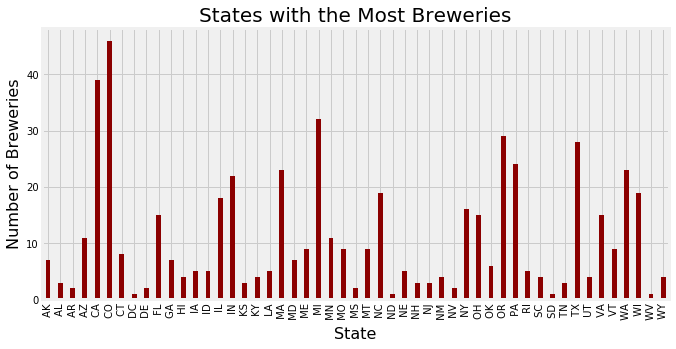

In [42]:
# We then apply "plot.bar()" so we can create a graphical representation of the data.
# We also set custom widths and color schemes to help better visualize the data.
from pylab import *
brewery_by_allstates = breweries_df.groupby('state')['name'].nunique().plot.bar(width = .4, color='darkred', figsize=(10,5))

# customized graph title and axis labels

brewery_by_allstates.set_title('States with the Most Breweries',fontsize=20)
brewery_by_allstates.set_xlabel('State',fontsize=16)
brewery_by_allstates.set_ylabel('Number of Breweries',fontsize=16)

plt.show()

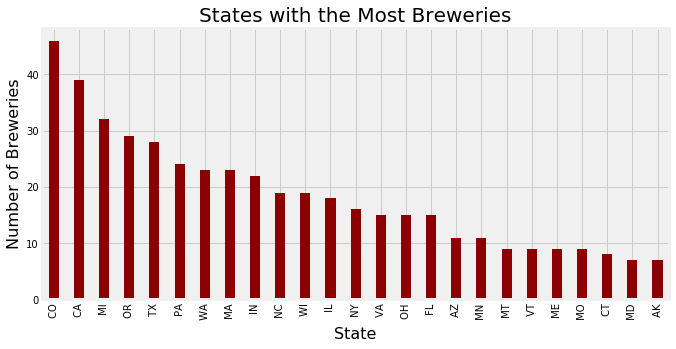

In [43]:
# This generates the number of unique breweries that exist in each of the states.
# We then apply "plot.bar()"" so we can create a graphical representation of the data.
# Changing the width and color scheme of the graphic also helps for visualization.

# To help make more sense from this data visualization, we used ".sort_values(ascending=False)" to show them in descending order
# for each state so we could see the trend of high to low and make some sense of which states have the most
# breweries, so we can look for further insights relative to states or breweries themselves.

brewery_by_allstates2 = breweries_df.groupby('state')['name'].nunique().sort_values(ascending=False).head(25).plot.bar(width = .4, color = 'darkred', figsize=(10,5))
brewery_by_allstates2.set_title('States with the Most Breweries',fontsize=20)
brewery_by_allstates2.set_xlabel('State',fontsize=16)
brewery_by_allstates2.set_ylabel('Number of Breweries',fontsize=16)
plt.show()

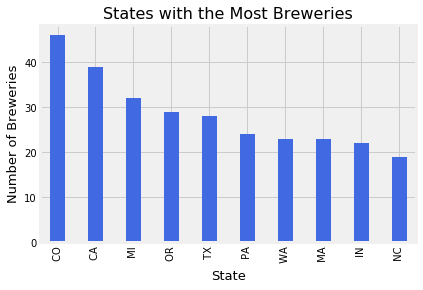

In [44]:
# We then decided to take this a step further and filter the previous graph down to only the states
# with the highest count of breweries. We decided on looking at the top ten.
# In addition to that, we have added a title, x-axis label and a y-axis label in order to appropriately
# label the visualization. Looking at the below visualization, we will be using the same or similair format
# going forward throughout the rest of the presentation.

breweries_by_state_df = breweries_df.groupby('state')['name'].nunique().sort_values(ascending=False).head(10).plot.bar(width = .4,color = 'royalblue')
breweries_by_state_df.set_title('States with the Most Breweries',fontsize=16)
breweries_by_state_df.set_xlabel('State',fontsize=13)
breweries_by_state_df.set_ylabel('Number of Breweries',fontsize=13)
plt.show()

# When filtering the breweries dataframe for the states with the most breweries, we found that
# Colorado, California, Michigan, Oregaon, Texas, Pennsylvania, Washington, Massachusets, Indiana
# and North Carolina were in the top ten.


## What Are the Top 10 Most Common Beers?
- this looks at the most commonly served beer styles in the brewery dataframe.

### Steps:
- ran groupby function via matplotlib that provided us with the top 10 most common beer types ranked from highest to lowest.
- visualized data using various graphs charts, etc.

In [45]:
# created new output using .groupby() function to get number of beer styles 
# grouped beer id by the style and sorted in descending order
# used head(10) to only show the top 10. 

beer_styles_df3 = beers_df.groupby('style')['id'].nunique().sort_values(ascending=False).head(10)
print(beer_styles_df3)

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: id, dtype: int64


# Findings:

- the American IPA came out on top at **424**, and was significantly higher than the remaining top 9.
- the APA (American Pale Ale) was a still strong second at **245**.
- after these first two, there is a pretty significant drop-off.  The top 2 are clear standouts in the data, so we looked into these further.
- a key finding in our research on these two beers is that American IPAs arrived along with American Pale Ale in the early days of American craft brewing. (3)

### American IPA

- IPA is the most popular style in craft beer, and doesn’t look to be giving up its spot any time soon. Hops are still what define the spiritual center of American craft brewing, and IPA is the flagship style for this ingredient. (3)
- Its beginnings closely coincide with the modern craft beer revolution that started in the late 70’s and build to the tidal wave of popularity the U.S. is experiencing today. (4)


### American Pale Ale 

- The style that was more responsible than any other for launching the American craft brewing scene began as a vehicle for expressing the one ingredient that truly distinguished the U.S. from the European nations where most of our classic styles originated: our hops. Big, bold American hops were unlike any varieties grown in the Old World, and first wave American craft brewers planted their flag with the expressive citrus and pine aromas of North American hops like Cascade. (3)

# Conclusion:
- The findings in our data coincide with this historical research that suggests these two beers were pivotal cornerstones to the American craft brewery movement.  Due to this, they are the most commonly found beers in breweries across the United States.

### Pie Chart
- shows a solid representation of the top 10 most common types and highlights what percentage of the top 10 each beer type owns

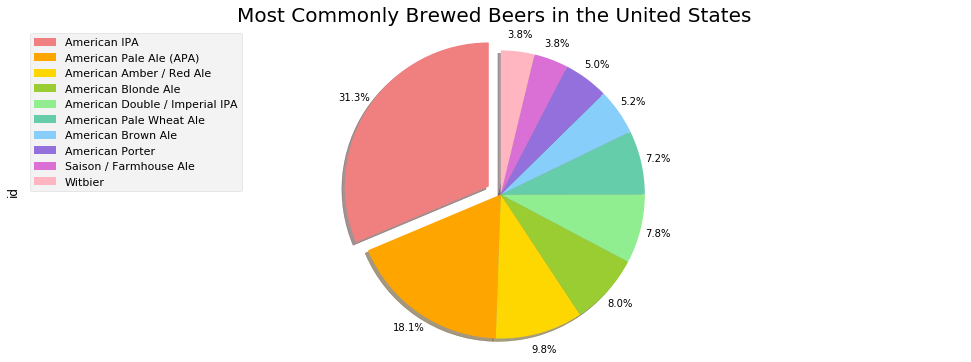

In [96]:
# create a pie chart showcasing the top 10 beers, and explode out the most common, American IPA

# create variable explode to tell the function to only explode the first element by 0.1
# exploding is a way to highlight a certain piece of data by slightly separating it from the rest of the pie 

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors= ['lightcoral','orange','gold','yellowgreen','lightgreen','mediumaquamarine','lightskyblue','mediumpurple','orchid','lightpink']
# use matplotlib .pie() function
# set custom attributes to make it prettier such as a shadow, figure size, start angle to put the American IPA on the top

beer_styles_df3.plot(kind='pie',explode=explode, shadow=True, labels=None, colors=colors, startangle=90, pctdistance=1.12,figsize=(15,6), autopct='%1.1f%%')
plt.title('Most Commonly Brewed Beers in the United States',fontsize=20)
plt.axis('equal')
plt.legend(labels=beer_styles_df3.index,loc='upper left',fontsize=11)
plt.show()

### Bar Chart 
- displays the top 10 most common beers in descending order from left to right 


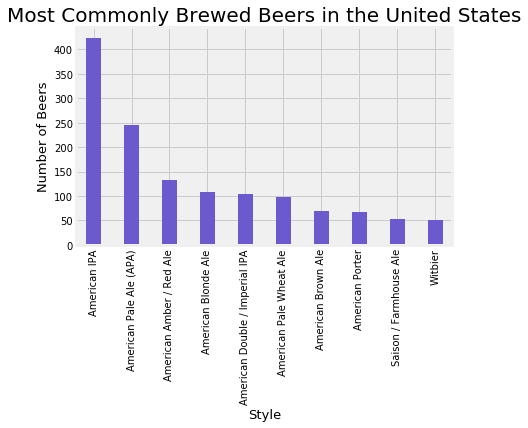

In [47]:
# create new variable for bar chart and use dataframe that grouped by top 10

beer_styles_df_bar = beer_styles_df3.plot.bar(width = .4, color = 'slateblue')
beer_styles_df_bar.set_title('',fontsize=20)
beer_styles_df_bar.set_title('Most Commonly Brewed Beers in the United States',fontsize=20)
beer_styles_df_bar.set_xlabel('Style',fontsize=13)
beer_styles_df_bar.set_ylabel('Number of Beers',fontsize=13)
plt.show()

### references:
1. set up a basic pie chart in matplotlib  https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
2. show the values of each beer type https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed-python?rq=1
3. info on craft beer styles https://www.morebeer.com/articles/Popular-Craft-Beer-Styles
4. info on craft beer styles https://learn.kegerator.com/american-ipa/ 

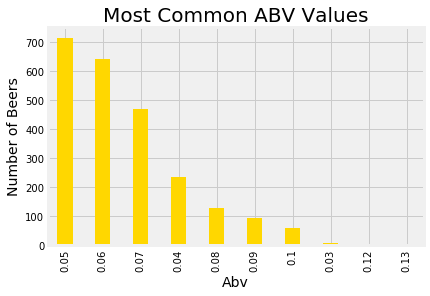

In [48]:
# *title and y axis 
# add description 

beer_styles_df4 = beers_df.groupby('abv')['id'].nunique().sort_values(ascending=False).head(10).plot.bar(width = .4, color = 'gold')
beer_styles_df4.set_title('Most Common ABV Values',fontsize=20)
beer_styles_df4.set_xlabel('Abv',fontsize=14)
beer_styles_df4.set_ylabel('Number of Beers',fontsize=14)
plt.show()


# Average Alcohol by Volume Brewed in Each State
- to complete this, we need to combine the two datasets. 

In [49]:
# identify brewery_id as an index

breweries_df['brewery_id'] = breweries_df.index

# create a new dataframe that is a combo of both the breweries and beer dataframes

brewbeer_df = beers_df.merge(breweries_df, on="brewery_id")

# print the results to inspect 

brewbeer_df.head()

,Unnamed: 0,abv,id,name_x,style,brewery_id,ounces,ID,name_y,city,state,city_state
0,0,0.05,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR,"Bend, OR"
1,1,0.07,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"
2,2,0.07,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"
3,3,0.09,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"
4,4,0.07,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"


In [50]:
brewbeer_df.to_csv(r'./brewbeer.csv', index=None, header=True)

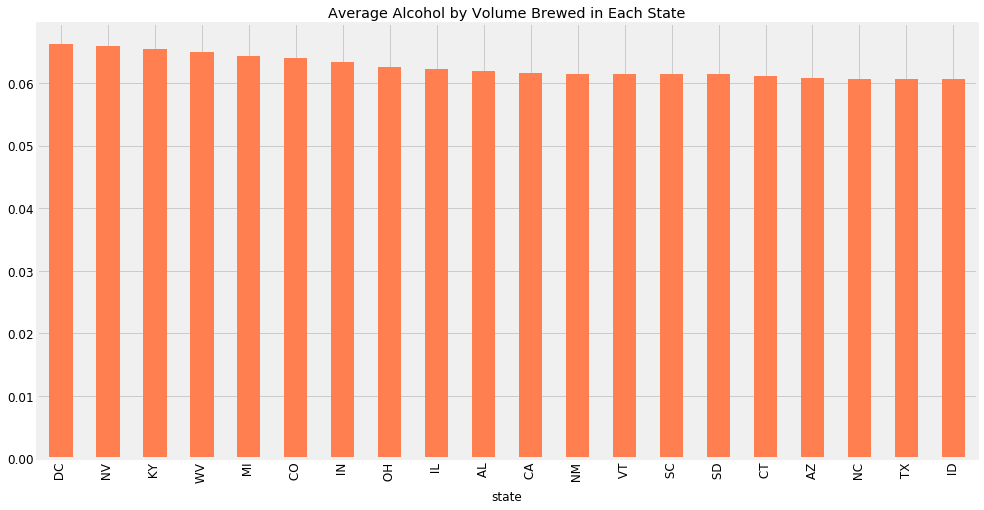

In [53]:
# create a groupby 
# try to scale
# make title bigger 

states_highest_alc = brewbeer_df.groupby('state')['abv'].mean().nlargest(20)

states_highest_alc.plot(kind='bar', figsize=(15,8), color='coral', title='Average Alcohol by Volume Brewed in Each State',fontsize=12)

plt.show()

In [54]:
#brewbeer_df.set_index(['state','style'], inplace=True)
#brewbeer_df.head()

In [55]:
type_by_state = brewbeer_df.loc[:, ['state', 'style']]
type_by_state.head()

,state,style
0,OR,American Pale Lager
1,IN,American Pale Ale (APA)
2,IN,American IPA
3,IN,American Double / Imperial IPA
4,IN,American IPA


In [56]:
pivot = brewbeer_df.pivot_table(index='state', columns='style',aggfunc='count', fill_value=0)
pivot.head()

ID                                 \
style Abbey Single Ale Altbier American Adjunct Lager   
state                                                   
 AK                  0       1                      0   
 AL                  0       0                      0   
 AR                  0       0                      0   
 AZ                  0       0                      0   
 CA                  0       0                      0   

                                                                               \
style American Amber / Red Ale American Amber / Red Lager American Barleywine   
state                                                                           
 AK                          2                          0                   0   
 AL                          0                          0                   0   
 AR                          1                          0                   0   
 AZ                          6                          0                   0   
 CA                         11                          2                   1   

                                                                 \
style American Black Ale American Blonde Ale American Brown Ale   
state                                                             
 AK                    0                   3                  1   
 AL                    0                   0                  1   
 AR                    0                   0                  0   
 AZ                    0                   2                  0   
 CA                    5                   7                  5   

                               ...      ounces                         \
style American Dark Wheat Ale  ... Schwarzbier Scotch Ale / Wee Heavy   
state                          ...                                      
 AK                         0  ...           0                      0   
 AL                         0  ...           0                      0   
 AR                         0  ...           0                      0   
 AZ                         0  ...           0                      0   
 CA                         0  ...           0                      1   

                                                                     \
style Scottish Ale Shandy Smoked Beer Tripel Vienna Lager Wheat Ale   
state                                                                 
 AK              2      0           0      0            0         0   
 AL              0      0           0      0            0         0   
 AR              0      0           0      0            0         0   
 AZ              1      0           0      0            0         0   
 CA              0      0           0      1            1         1   

                             
style Winter Warmer Witbier  
state                        
 AK               0       1  
 AL               0       0  
 AR               0       0  
 AZ               1       2  
 CA               3       3  

[5 rows x 990 columns]

In [57]:
# pivot.plot(kind='bar',stacked=True)
# plt.show()

In [58]:
type_by_state['style'].value_counts()
# Brewery_vs_winery.set_index('State_Abbrev').plot.bar(title="",stacked=True, figsize=(20,10))

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Smoked Beer                         1
Flanders Red Ale                    1
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Name: style, Length: 99, dtype: int64

## Beer Styles with Highest ABV

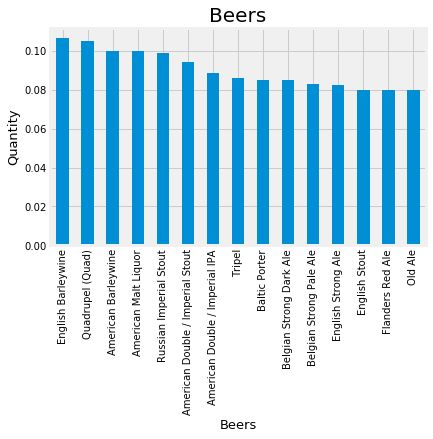

In [59]:
# add description of data, make title bigger

highest_abv = beers_df.groupby('style')['abv'].mean().nlargest(15).plot(kind='bar', title='Beer Styles with Highest Average Alcohol by Volume',rot=90)
highest_abv.set_title('Beers',fontsize=20)
highest_abv.set_ylabel('Quantity',fontsize=13)
highest_abv.set_xlabel('Beers',fontsize=13)
plt.show()

## Winery Comparison

In [60]:
# Which state has the most wineries
# This generates the number of unique wineries that exist in each state.
# we group the winery name by state using the groupby method
# California has the most wineries by over 3 thousand

uswinery_df.groupby('State')['Winery Name'].nunique().sort_values

<bound method Series.sort_values of State
AK       4
AL       7
AR       6
AZ      16
CA    1271
CO      49
CT      18
DE       2
FL      17
GA      14
HI       3
IA      26
ID      28
IL      49
IN      32
KS       9
KY      17
LA       6
MA      17
MD      18
ME       5
MI      46
MN      12
MO      48
MS       4
MT       6
NC      47
ND       2
NE      13
NH       4
NJ      28
NM      30
NV       2
NY     190
OH      63
OK      25
OR     204
PA      83
RI       4
SC       8
SD       2
TN      26
TX      73
UT       6
VA      85
VT      10
WA     214
WI      28
WV      14
WY       2
Name: Winery Name, dtype: int64>

In [61]:
geopandas_states_abbrev = ['HI',
                    'WA',
                    'MT',
                    'ME',
                    'ND',
                    'SD',
                    'WY',
                    'WI',
                    'ID',
                    'VT',
                    'MN',
                    'OR',
                    'NH',
                    'IA',
                    'MA',
                    'NE',
                    'NY',
                    'PA',
                    'CT',
                    'RI',
                    'NJ',
                    'IN',
                    'NV',
                    'UT',
                    'CA',
                    'OH',
                    'IL',
                    'DC',
                    'DE',
                    'WV',
                    'MD',
                    'CO',
                    'KY',
                    'KS',
                    'VA',
                    'MO',
                    'AZ',
                    'OK',
                    'NC',
                    'TN',
                    'TX',
                    'NM',
                    'AL',
                    'MS',
                    'GA',
                    'SC',
                    'AR',
                    'LA',
                    'FL',
                    'MI',
                    'AK']

In [62]:
Brewery_vs_winery = pd.DataFrame(geopandas_states_abbrev)

In [63]:
Winery_count= {'AK':4,
 'AL':7,
 'AR':6,
 'AZ':16,
 'CA':1271,
 'CO':49,
 'CT':18,
 'DC':0,
 'DE':2,
 'FL':17,
 'GA':14,
 'HI':3,
 'IA':26,
 'ID':28,
 'IL':49,
 'IN':32,
 'KS':9,
 'KY':17,
 'LA':6,
 'MA':17,
 'MD':18,
 'ME':5,
 'MI':46,
 'MN':12,
 'MO':48,
 'MS':4,
 'MT':6,
 'NC':47,
 'ND':2,
 'NE':13,
 'NH':4,
 'NJ':28,
 'NM':30,
 'NV':2,
 'NY':190,
 'OH':63,
 'OK':25,
 'OR':204,
 'PA':83,
 'RI':4,
 'SC':8,
 'SD':2,
 'TN':26,
 'TX':73,
 'UT':6,
 'VA':85,
 'VT':10,
 'WA':214,
 'WI':28,
 'WV':14,
 'WY':2
}

In [64]:
Count= {'AK':7,
 'AL':3,
 'AR':2,
 'AZ':11,
 'CA':39,
 'CO':46,
 'CT':8,
 'DC':1,
 'DE':2,
 'FL':15,
 'GA':7,
 'HI':4,
 'IA':5,
 'ID':5,
 'IL':18,
 'IN':22,
 'KS':3,
 'KY':4,
 'LA':5,
 'MA':23,
 'MD':7,
 'ME':9,
 'MI':32,
 'MN':11,
 'MO':9,
 'MS':2,
 'MT':9,
 'NC':19,
 'ND':1,
 'NE':5,
 'NH':3,
 'NJ':3,
 'NM':4,
 'NV':2,
 'NY':16,
 'OH':15,
 'OK':6,
 'OR':29,
 'PA':24,
 'RI':5,
 'SC':4,
 'SD':1,
 'TN':3,
 'TX':28,
 'UT':4,
 'VA':15,
 'VT':9,
 'WA':23,
 'WI':19,
 'WV':1,
 'WY':4
}

In [65]:
Brewery_vs_winery['winery_per_state'] = Brewery_vs_winery[0].map(Winery_count)

In [66]:
Brewery_vs_winery['brewery_per_state'] = Brewery_vs_winery[0].map(Count)

In [67]:
Brewery_vs_winery.rename(columns={0:'State_Abbrev'}, inplace=True)

In [68]:
Brewery_vs_winery.set_index('State_Abbrev').head(2)

,winery_per_state,brewery_per_state
State_Abbrev,,
HI,3,4
WA,214,23


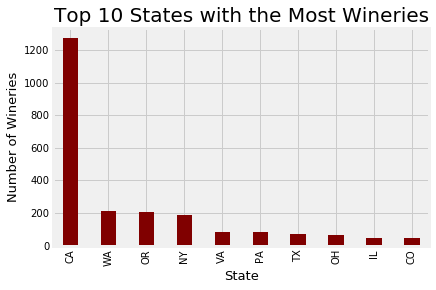

In [69]:
# this shows the count of wineries per state by the top 10 states on a bar graph
# due to california having such a large amount of wineries compared to the other states, this is not a good method to represent the counts

winery_by_state = uswinery_df.groupby('State')['Winery Name'].nunique().sort_values(ascending=False).head(10).plot.bar(width = .4,color = 'maroon')
winery_by_state.set_title('Top 10 States with the Most Wineries',fontsize=20)
winery_by_state.set_xlabel('State',fontsize=13)
winery_by_state.set_ylabel('Number of Wineries',fontsize=13)
plt.show()

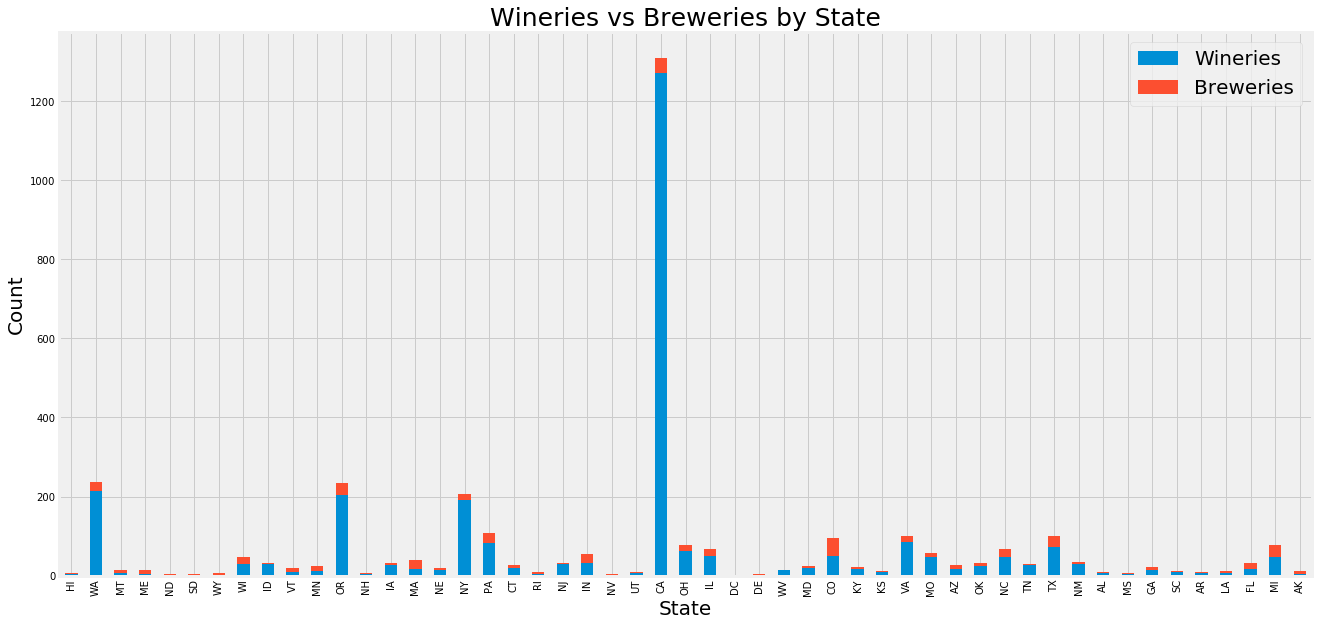

In [70]:
brewery_vs_winerydf = Brewery_vs_winery.set_index('State_Abbrev').plot.bar(title="",stacked=True, figsize=(20,10))
brewery_vs_winerydf.set_title('Wineries vs Breweries by State',fontsize=25)
brewery_vs_winerydf.set_xlabel('State',fontsize=20)
brewery_vs_winerydf.set_ylabel('Count',fontsize=20)
brewery_vs_winerydf.legend(["Wineries", "Breweries"],fontsize=20)
plt.show()

In [71]:
US_only = winery_df.loc[winery_df['country'] == 'US',['state','state_abbrev', 'region_1']]
US_only.head()

,state,state_abbrev,region_1
0,California,CA,Napa Valley
2,California,CA,Knights Valley
3,Oregon,OR,Willamette Valley
8,Oregon,OR,Chehalem Mountains
9,California,CA,Sonoma Coast


In [72]:
US_only.set_index('state_abbrev').head()

,state,region_1
state_abbrev,,
CA,California,Napa Valley
CA,California,Knights Valley
OR,Oregon,Willamette Valley
OR,Oregon,Chehalem Mountains
CA,California,Sonoma Coast


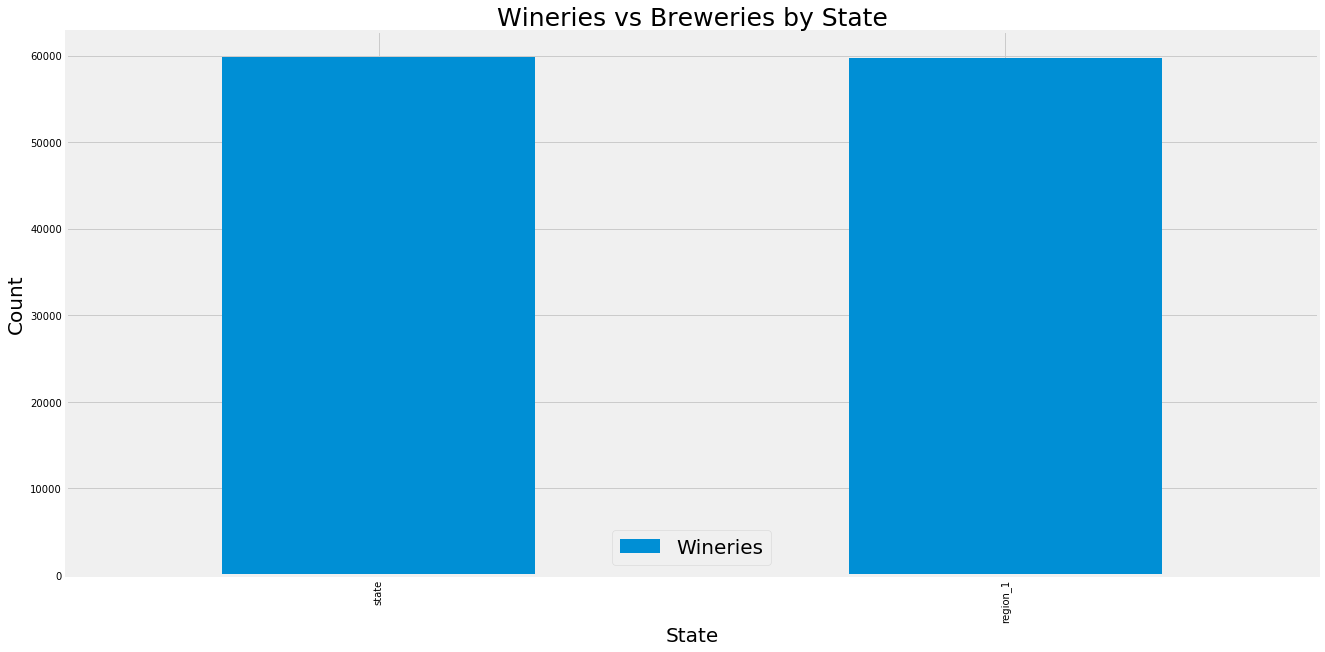

In [73]:
us_winery_ava = US_only.set_index('state_abbrev').count().plot.bar(title="",stacked=True, figsize=(20,10))
us_winery_ava.set_title('Wineries vs Breweries by State',fontsize=25)
us_winery_ava.set_xlabel('State',fontsize=20)
us_winery_ava.set_ylabel('Count',fontsize=20)
us_winery_ava.legend(["Wineries", "Breweries"],fontsize=20)
plt.show()

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Census_Regions_and_Division_of_the_United_States.svg/1024px-Census_Regions_and_Division_of_the_United_States.svg.png' width="600" height="200" />

##### *Source: Wikipedia*





**Next Steps:**
1. Upload classifications for states into divisions and regions.
2. Append the classifications of each state into df_breweries dataframe.
3. Run the same descriptive statistics that were previously ran by state, but now for the divisions and regions.
4. Create visualizations with results and provide comments.

# Categorizing Beer Types

In [74]:
beers_df[beers_df['style'].str.contains(" IPA")==True]

,Unnamed: 0,abv,id,name,style,brewery_id,ounces
2,2,0.07,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.09,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.07,2262,Sex and Candy,American IPA,177,12.0
9,9,0.09,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
13,13,0.09,1980,Troll Destroyer,Belgian IPA,177,12.0
...,...,...,...,...,...,...,...
2395,2395,0.07,1697,Be Hoppy IPA,American IPA,339,16.0
2396,2396,0.07,2194,Worthy IPA,American IPA,199,12.0
2398,2398,0.08,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0
2399,2399,0.07,1512,Worthy IPA (2013),American IPA,199,12.0


In [75]:
beers_df[beers_df['style'].str.contains(" Ale")==True]

,Unnamed: 0,abv,id,name,style,brewery_id,ounces
1,1,0.07,2265,Devil's Cup,American Pale Ale (APA),177,12.0
6,6,0.04,2260,Lake Street Express,American Pale Ale (APA),177,12.0
8,8,0.06,2258,Jade,American Pale Ale (APA),177,12.0
10,10,0.07,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,11,0.07,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
...,...,...,...,...,...,...,...
2402,2402,0.08,1316,Colorojo Imperial Red Ale,American Strong Ale,424,12.0
2403,2403,0.06,1045,Wynkoop Pumpkin Ale,Pumpkin Ale,424,12.0
2406,2406,0.05,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2408,2408,0.06,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [76]:
beers_df[beers_df['style'].str.contains(" Stout")==True]

,Unnamed: 0,abv,id,name,style,brewery_id,ounces
5,5,0.08,2261,Black Exodus,Oatmeal Stout,177,12.0
23,23,0.08,976,Marooned On Hog Island,American Stout,368,12.0
71,71,0.08,2684,35 K,Milk / Sweet Stout,1,16.0
82,82,0.05,1594,Maylani's Coconut Stout,American Stout,367,16.0
105,105,0.06,1520,Barney Flats Oatmeal Stout,Oatmeal Stout,171,12.0
...,...,...,...,...,...,...,...
2332,2332,0.07,2222,10 Ton,Oatmeal Stout,94,16.0
2347,2347,NaN,2344,O’Malley’s Stout,English Stout,132,12.0
2367,2367,0.06,366,Jack Stout,Oatmeal Stout,361,12.0
2374,2374,0.05,826,Mystical Stout,Irish Dry Stout,499,16.0


In [77]:
beers_df[beers_df['style'].str.contains(" Porter")==True]

,Unnamed: 0,abv,id,name,style,brewery_id,ounces
7,7,0.07,2259,Foreman,American Porter,177,12.0
19,19,0.08,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0
130,130,0.06,2509,Porter (a/k/a Black Gold Porter),American Porter,69,16.0
139,139,0.05,429,Ninja Porter,American Porter,528,12.0
148,148,0.06,979,Poop Deck Porter,American Porter,374,12.0
...,...,...,...,...,...,...,...
2198,2198,0.07,1754,Parade Ground Coffee Porter,American Porter,152,12.0
2269,2269,0.08,346,Baltic Porter,Baltic Porter,522,16.0
2335,2335,0.07,2356,Pay It Forward Cocoa Porter,American Porter,100,12.0
2380,2380,0.08,761,P-51 Porter,American Porter,509,16.0


## Geopandas

In [78]:
import geopandas
import geoplot
import pandas as pd
from shapely import wkt
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString, Polygon
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from pathlib import Path
from PIL import Image
from IPython.display import HTML
from matplotlib import animation, rc
import plotly.figure_factory as ff

,geometry
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


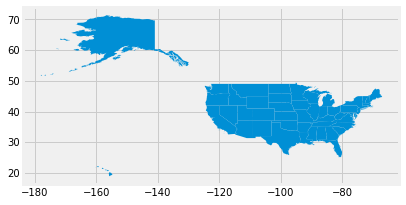

In [79]:
usa = geopandas.read_file("states.shp")
usa_geo = geopandas.GeoDataFrame(usa, crs = {'init' :'epsg:4326'}, geometry = usa.geometry)
usa_geo.plot()
usa_geo.head()

In [80]:
geopandas_states_abbrev = ['HI',
                    'WA',
                    'MT',
                    'ME',
                    'ND',
                    'SD',
                    'WY',
                    'WI',
                    'ID',
                    'VT',
                    'MN',
                    'OR',
                    'NH',
                    'IA',
                    'MA',
                    'NE',
                    'NY',
                    'PA',
                    'CT',
                    'RI',
                    'NJ',
                    'IN',
                    'NV',
                    'UT',
                    'CA',
                    'OH',
                    'IL',
                    'DC',
                    'DE',
                    'WV',
                    'MD',
                    'CO',
                    'KY',
                    'KS',
                    'VA',
                    'MO',
                    'AZ',
                    'OK',
                    'NC',
                    'TN',
                    'TX',
                    'NM',
                    'AL',
                    'MS',
                    'GA',
                    'SC',
                    'AR',
                    'LA',
                    'FL',
                    'MI',
                    'AK']

In [81]:
usa['state_abbrev'] = geopandas_states_abbrev
usa.head(2)

,geometry,state_abbrev
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA


In [82]:
geopandas_states = {'HI':'Hawaii',
                   'WA':'Washington',
                   'MT':'Montana',
                   'ME': 'Maine',
                   'ND': 'North Dakota',
                   'SD': 'South Dakota',
                   'WY': 'Wyoming',
                   'WI': 'Wisconsin',
                   'ID': 'Idaho',
                   'VT': 'Vermont',
                   'MN': 'Minnesota',
                   'OR': 'Oregon',
                   'NH': 'New Hampshire',
                   'IA': 'Iowa',
                   'MA': 'Massachusetts',
                   'NE': 'Nebraska',
                   'NY': 'New York',
                   'PA': 'Pennsylvania',
                   'CT': 'Connecticut',
                   'RI': 'Rhode Island',
                   'NJ': 'New Jersey',
                   'IN': 'Indiana',
                   'NV': 'Nevada',
                   'UT': 'Utah',
                   'CA': 'California',
                   'OH': 'Ohio',
                   'IL': 'Illinois',
                   'DC': 'Washington DC',
                   'DE': 'Delaware',
                   'WV': 'West Virginia',
                   'MD': 'Maryland',
                   'CO': 'Colorado',
                   'KY': 'Kentucky',
                   'KS': 'Kansas',
                   'VA': 'Virginia',
                   'MO': 'Missouri',
                   'AZ': 'Arizona',
                   'OK': 'Oklahoma',
                   'NC': 'North Carolina',
                   'TN': 'Tennessee',
                   'TX': 'Texas',
                   'NM': 'New Mexico',
                   'AL': 'Alabama',
                   'MS': 'Mississippi',
                   'GA': 'Georgia',
                   'SC': 'South Carolina',
                   'AR': 'Arkansas',
                   'LA': 'Louisiana',
                   'FL': 'Florida',
                   'MI': 'Michigan',
                   'AK': 'Alaska'
                   }

In [83]:
usa['state'] = usa['state_abbrev'].map(geopandas_states)
usa.head(2)

,geometry,state_abbrev,state
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI,Hawaii
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,Washington


In [84]:
Count= {'AK':7,
 'AL':3,
 'AR':2,
 'AZ':11,
 'CA':39,
 'CO':46,
 'CT':8,
 'DC':1,
 'DE':2,
 'FL':15,
 'GA':7,
 'HI':4,
 'IA':5,
 'ID':5,
 'IL':18,
 'IN':22,
 'KS':3,
 'KY':4,
 'LA':5,
 'MA':23,
 'MD':7,
 'ME':9,
 'MI':32,
 'MN':11,
 'MO':9,
 'MS':2,
 'MT':9,
 'NC':19,
 'ND':1,
 'NE':5,
 'NH':3,
 'NJ':3,
 'NM':4,
 'NV':2,
 'NY':16,
 'OH':15,
 'OK':6,
 'OR':29,
 'PA':24,
 'RI':5,
 'SC':4,
 'SD':1,
 'TN':3,
 'TX':28,
 'UT':4,
 'VA':15,
 'VT':9,
 'WA':23,
 'WI':19,
 'WV':1,
 'WY':4
}

In [85]:
usa['brewery_count'] = usa['state_abbrev'].map(Count)
usa.head(2)

,geometry,state_abbrev,state,brewery_count
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI,Hawaii,4
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,Washington,23


In [86]:
abbrev_state = {' HI':'Hawaii',
                   ' WA':'Washington',
                   ' MT':'Montana',
                   ' ME': 'Maine',
                   ' ND': 'North Dakota',
                   ' SD': 'South Dakota',
                   ' WY': 'Wyoming',
                   ' WI': 'Wisconsin',
                   ' ID': 'Idaho',
                   ' VT': 'Vermont',
                   ' MN': 'Minnesota',
                   ' OR': 'Oregon',
                   ' NH': 'New Hampshire',
                   ' IA': 'Iowa',
                   ' MA': 'Massachusetts',
                   ' NE': 'Nebraska',
                   ' NY': 'New York',
                   ' PA': 'Pennsylvania',
                   ' CT': 'Connecticut',
                   ' RI': 'Rhode Island',
                   ' NJ': 'New Jersey',
                   ' IN': 'Indiana',
                   ' NV': 'Nevada',
                   ' UT': 'Utah',
                   ' CA': 'California',
                   ' OH': 'Ohio',
                   ' IL': 'Illinois',
                   ' DC': 'Washington DC',
                   ' DE': 'Delaware',
                   ' WV': 'West Virginia',
                   ' MD': 'Maryland',
                   ' CO': 'Colorado',
                   ' KY': 'Kentucky',
                   ' KS': 'Kansas',
                   ' VA': 'Virginia',
                   ' MO': 'Missouri',
                   ' AZ': 'Arizona',
                   ' OK': 'Oklahoma',
                   ' NC': 'North Carolina',
                   ' TN': 'Tennessee',
                   ' TX': 'Texas',
                   ' NM': 'New Mexico',
                   ' AL': 'Alabama',
                   ' MS': 'Mississippi',
                   ' GA': 'Georgia',
                   ' SC': 'South Carolina',
                   ' AR': 'Arkansas',
                   ' LA': 'Louisiana',
                   ' FL': 'Florida',
                   ' MI': 'Michigan',
                   ' AK': 'Alaska'
                   }

In [87]:
LongLat2 = {'Wisconsin':(44.500000,-89.500000),
           'West Virginia' : (39.000000,-80.500000),
           'Vermont': (44.000000,-72.699997),
           'Texas': (31.000000,-100.000000),
           'South Dakota':(44.500000,-100.000000),
           'Rhode Island':(41.700001,-71.500000),
           'Oregon':(44.000000, -120.500000),
           'New York':(43.000000,-75.000000),
           'New Hampshire':(44.000000,-71.500000),
           'Nebraska':(41.500000,-100.000000),
           'Kansas':(38.500000,-98.000000),
           'Mississippi':(33.000000,-90.000000),
           'Illinois':(40.000000,-89.000000),
           'Delaware': (39.000000,-75.500000),
           'Connecticut':(41.599998,-72.699997),
           'Arkansas':(34.799999,-92.199997),
           'Indiana':(40.273502,-86.126976),
           'Missouri':(38.573936,-92.603760),
           'Florida':(27.994402,-81.760254),
           'Nevada':(39.876019,-117.224121),
           'Maine':(45.367584,-68.972168),
           'Michigan':(44.182205,-84.506836),
           'Georgia':(33.247875,-83.441162),
           'Hawaii':(20.716179,-158.214676),
           'Alaska':(66.160507,-153.369141),
           'Tennessee':(35.860119,-86.660156),
           'Virginia':(37.926868,-78.024902),
           'New Jersey':(39.833851,-74.871826),
           'Kentucky':(37.839333,-84.270020),
           'North Dakota':(47.650589,-100.437012),
           'Minnesota':(46.392410,-94.636230),
           'Oklahoma':(36.084621,-96.921387),
           'Montana':(46.965260,-109.533691),
           'Washington':(47.751076,-120.740135),
           'Washington DC': (38.9072,-77.0369),
           'Utah':(39.419220,-111.950684),
           'Colorado':(39.113014,-105.358887),
           'Ohio':(40.367474,-82.996216),
           'Alabama':(32.318230,-86.902298),
           'Iowa':(42.032974,-93.581543),
           'New Mexico':(34.307144,-106.018066),
           'South Carolina':(33.836082,-81.163727),
           'Pennsylvania':(41.203323,-77.194527),
           'Arizona':(34.048927,-111.093735),
           'Maryland':(39.045753,-76.641273),
           'Massachusetts':(42.407211,-71.382439),
           'California':(36.778259,-119.417931),
           'Idaho':(44.068203,-114.742043),
           'Wyoming':(43.075970,-107.290283),
           'North Carolina':(35.782169,-80.793457),
           'Louisiana':(30.391830,-92.329102)
          }

In [88]:
latitude = {'Wisconsin':44.500000,
           'West Virginia' : 39.000000,
           'Vermont': 44.000000,
           'Texas': 31.000000,
           'South Dakota':44.500000,
           'Rhode Island':41.700001,
           'Oregon':44.000000,
           'New York':43.000000,
           'New Hampshire':44.000000,
           'Nebraska':41.500000,
           'Kansas':38.500000,
           'Mississippi':33.000000,
           'Illinois':40.000000,
           'Delaware': 39.000000,
           'Connecticut':41.599998,
           'Arkansas':34.799999,
           'Indiana':40.273502,
           'Missouri':38.573936,
           'Florida':27.994402,
           'Nevada':39.876019,
           'Maine':45.367584,
           'Michigan':44.182205,
           'Georgia':33.247875,
           'Hawaii':20.716179,
           'Alaska':66.160507,
           'Tennessee':35.860119,
           'Virginia':37.926868,
           'New Jersey':39.833851,
           'Kentucky':37.839333,
           'North Dakota':47.650589,
           'Minnesota':46.392410,
           'Oklahoma':36.084621,
           'Montana':46.965260,
           'Washington':47.751076,
           'Washington DC': 38.9072,
           'Utah':39.419220,
           'Colorado':39.113014,
           'Ohio':40.367474,
           'Alabama':32.318230,
           'Iowa':42.032974,
           'New Mexico':34.307144,
           'South Carolina':33.836082,
           'Pennsylvania':41.203323,
           'Arizona':34.048927,
           'Maryland':39.045753,
           'Massachusetts':42.407211,
           'California':36.778259,
           'Idaho':44.068203,
           'Wyoming':43.075970,
           'North Carolina':35.782169,
           'Louisiana':30.391830,
          }

In [89]:
# check the datatype of the geometry in the df
type(usa.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

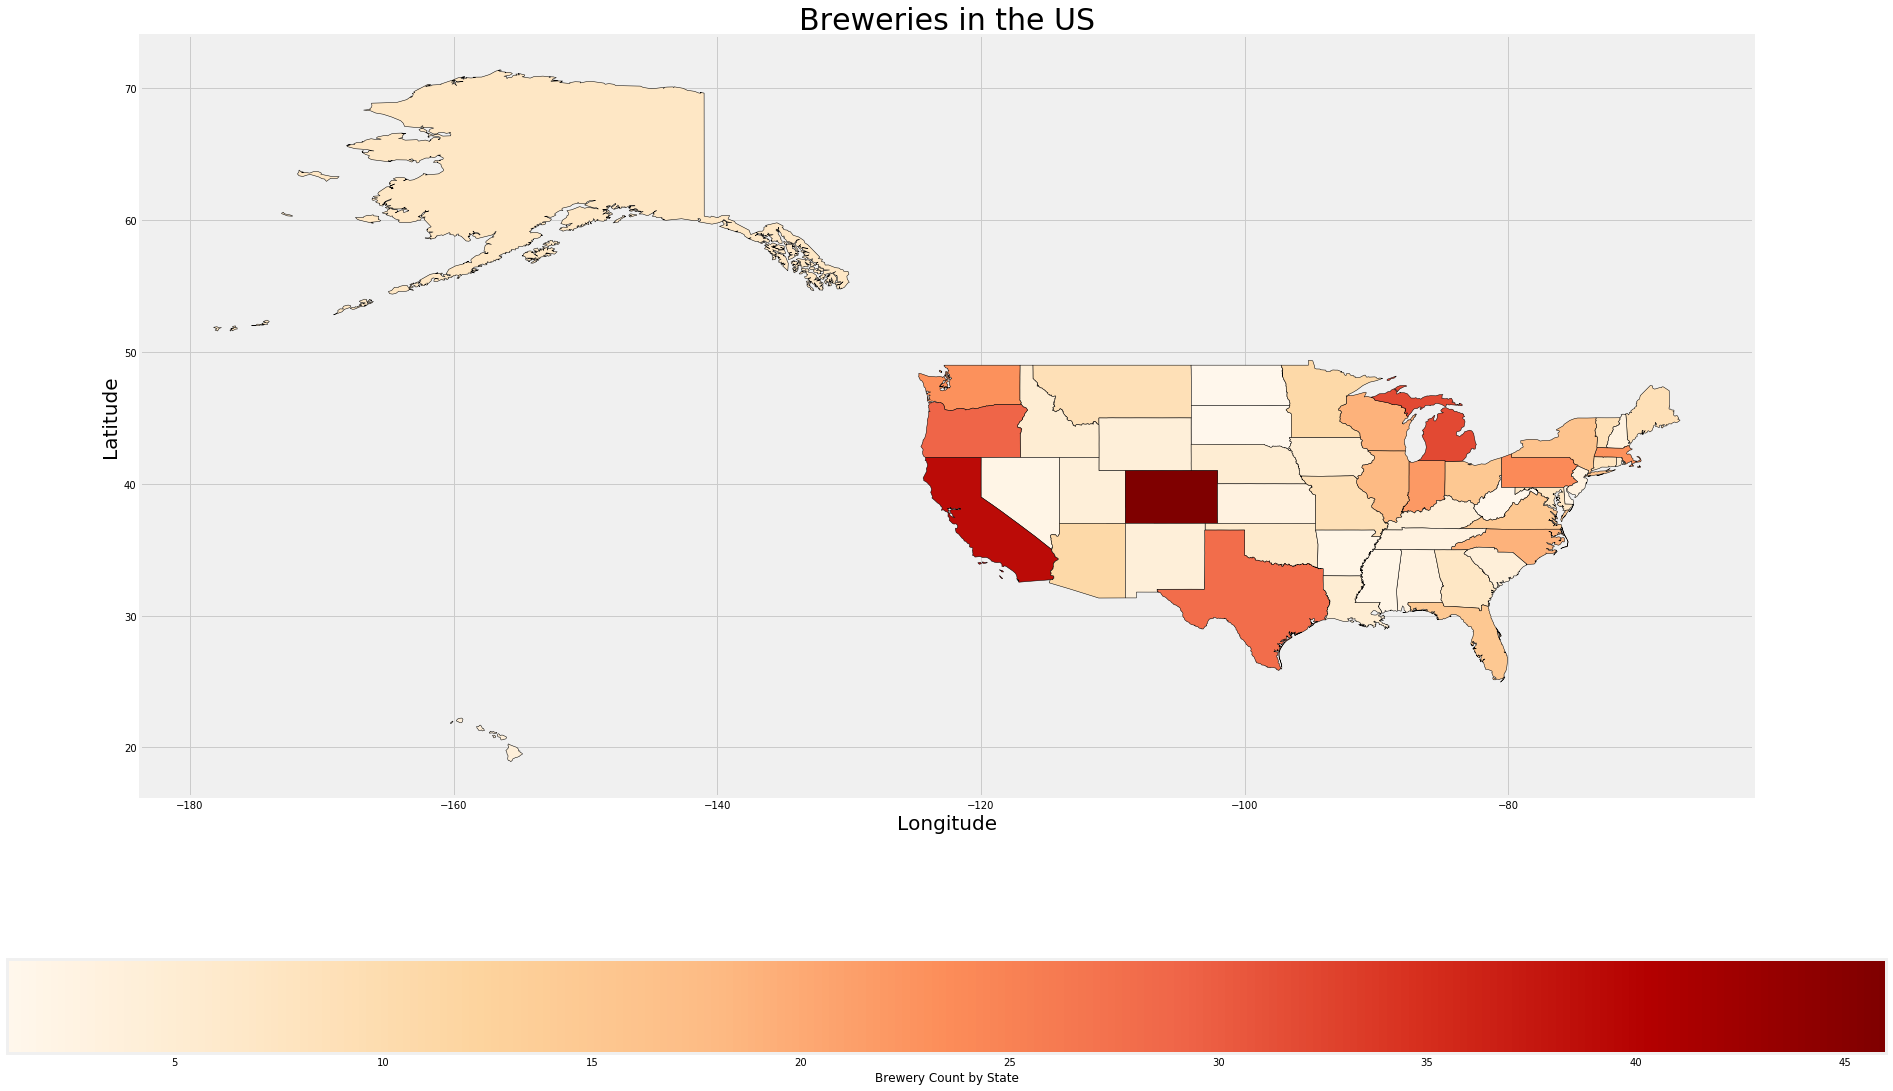

In [90]:
usa.plot(column='brewery_count',figsize=(30,20), cmap='OrRd', edgecolor='black',legend=True,legend_kwds={'label': "Brewery Count by State",'orientation': "horizontal"})
plt.title('Breweries in the US',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

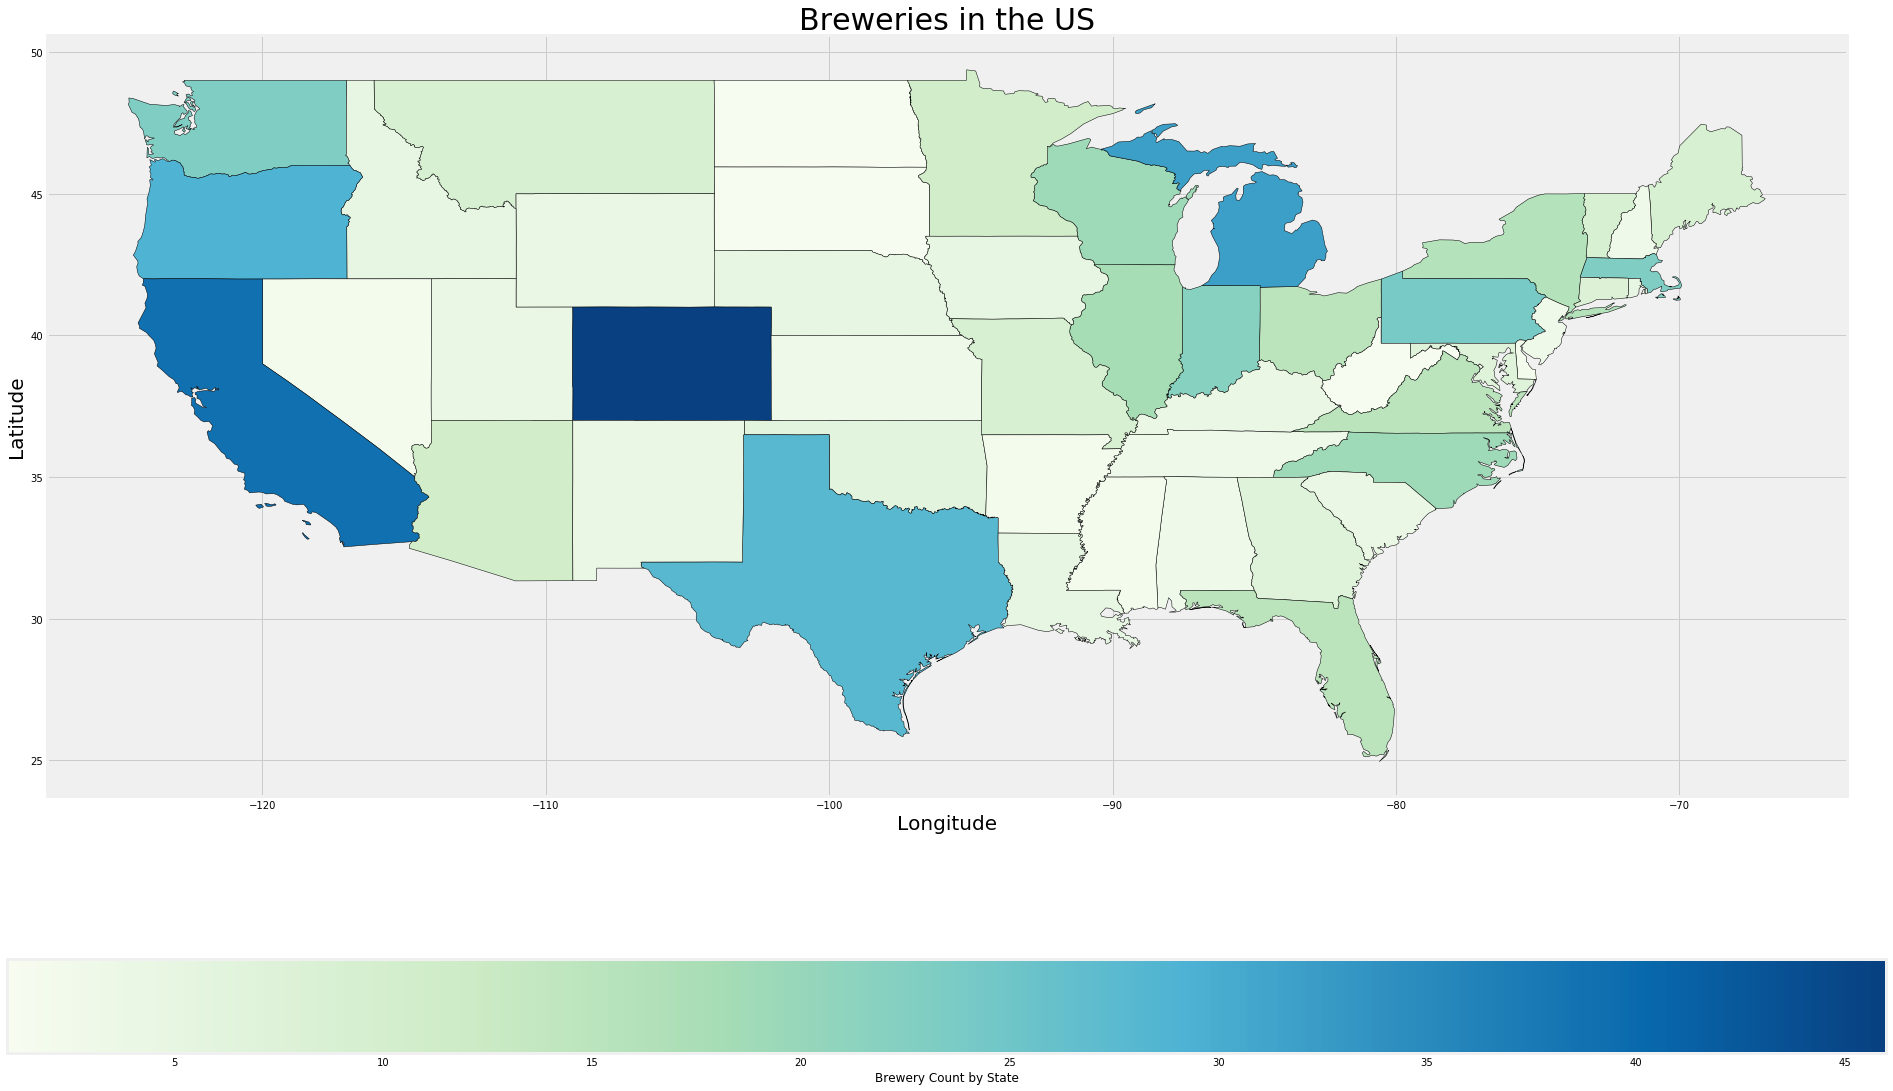

In [91]:
usa[usa['state'].isin(['Alaska','Hawaii']) == False].plot(column='brewery_count',figsize=(30,20), cmap='GnBu', edgecolor='black',legend=True,legend_kwds={'label': "Brewery Count by State",'orientation': "horizontal"})
plt.title('Breweries in the US',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

In [92]:
Winery_count= {'AK':4,
 'AL':7,
 'AR':6,
 'AZ':16,
 'CA':1271,
 'CO':49,
 'CT':18,
 'DC':0,
 'DE':2,
 'FL':17,
 'GA':14,
 'HI':3,
 'IA':26,
 'ID':28,
 'IL':49,
 'IN':32,
 'KS':9,
 'KY':17,
 'LA':6,
 'MA':17,
 'MD':18,
 'ME':5,
 'MI':46,
 'MN':12,
 'MO':48,
 'MS':4,
 'MT':6,
 'NC':47,
 'ND':2,
 'NE':13,
 'NH':4,
 'NJ':28,
 'NM':30,
 'NV':2,
 'NY':190,
 'OH':63,
 'OK':25,
 'OR':204,
 'PA':83,
 'RI':4,
 'SC':8,
 'SD':2,
 'TN':26,
 'TX':73,
 'UT':6,
 'VA':85,
 'VT':10,
 'WA':214,
 'WI':28,
 'WV':14,
 'WY':2
}

In [93]:
usa['winery_count'] = usa['state_abbrev'].map(Winery_count)
usa.head(2)

,geometry,state_abbrev,state,brewery_count,winery_count
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI,Hawaii,4,3
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,Washington,23,214


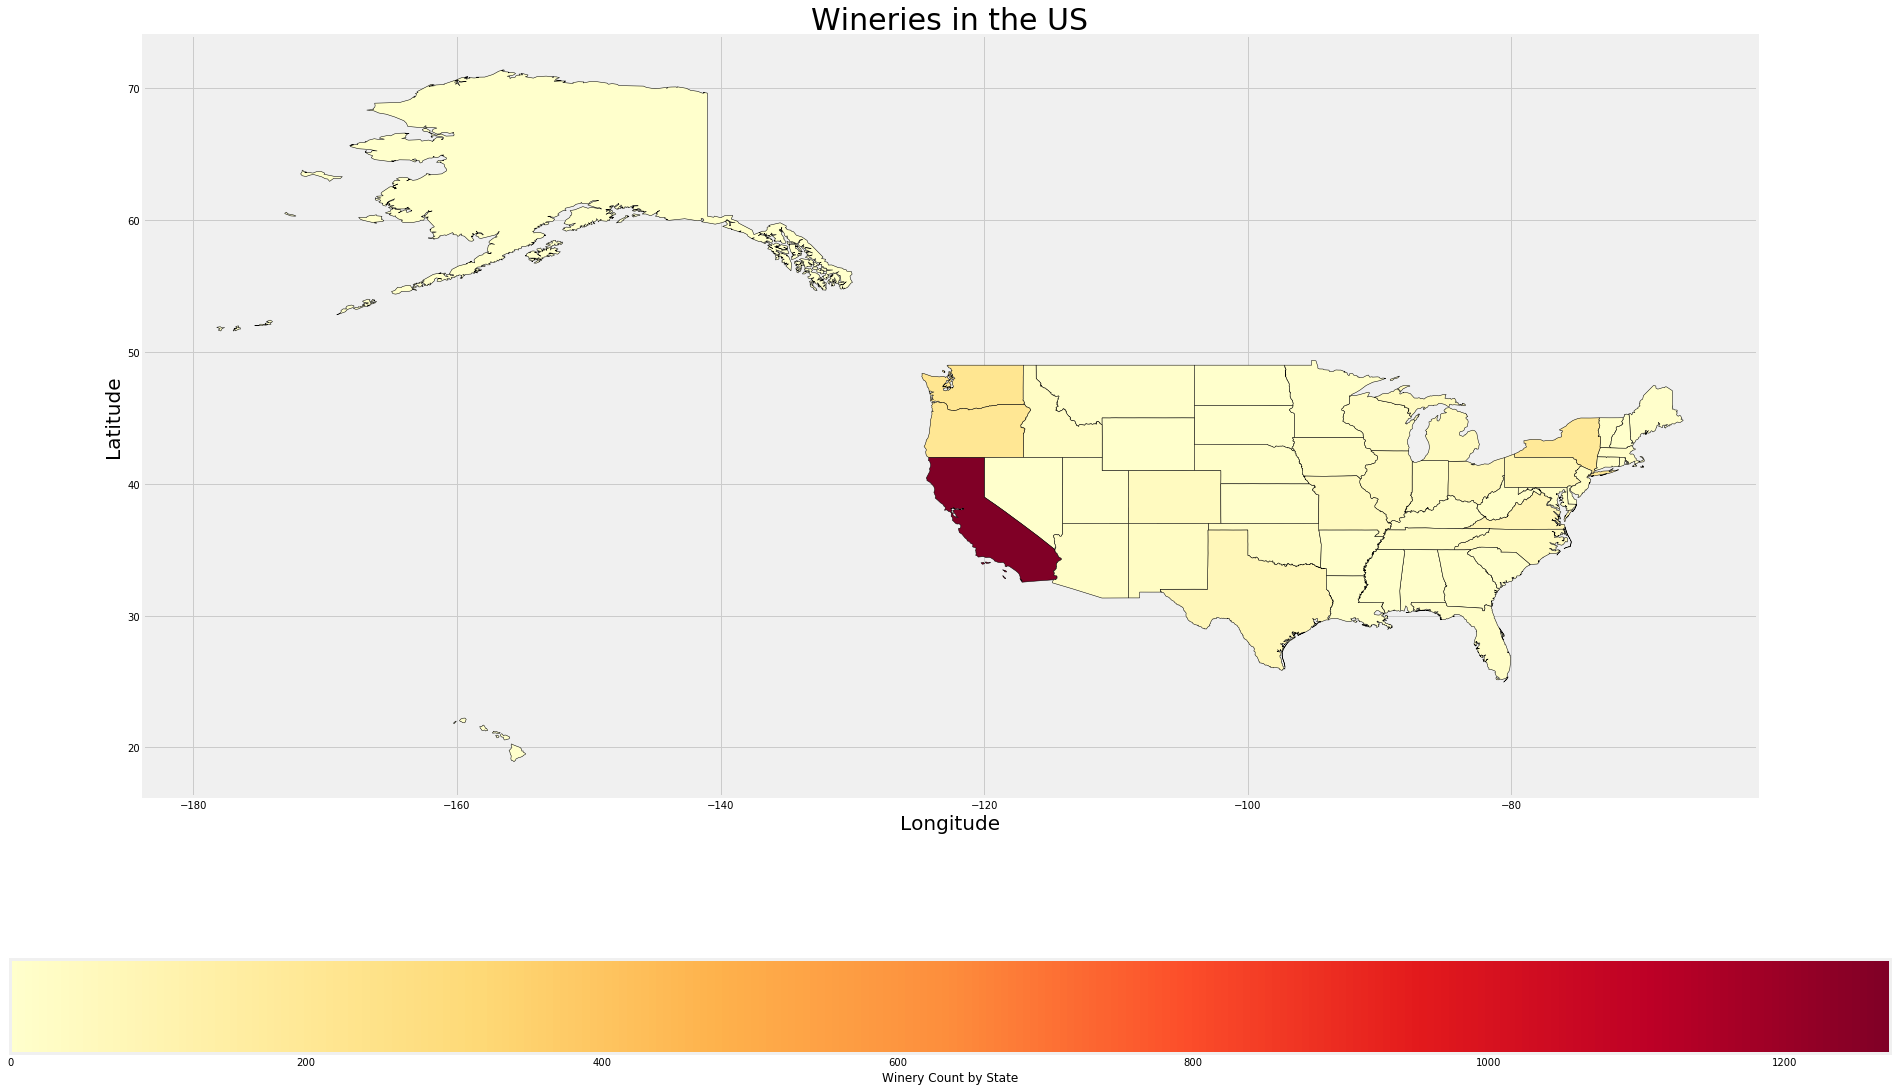

In [94]:
usa.plot(column='winery_count',figsize=(30,20), cmap='YlOrRd', edgecolor='black',legend=True,legend_kwds={'label': "Winery Count by State",'orientation': "horizontal"})
plt.title('Wineries in the US',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

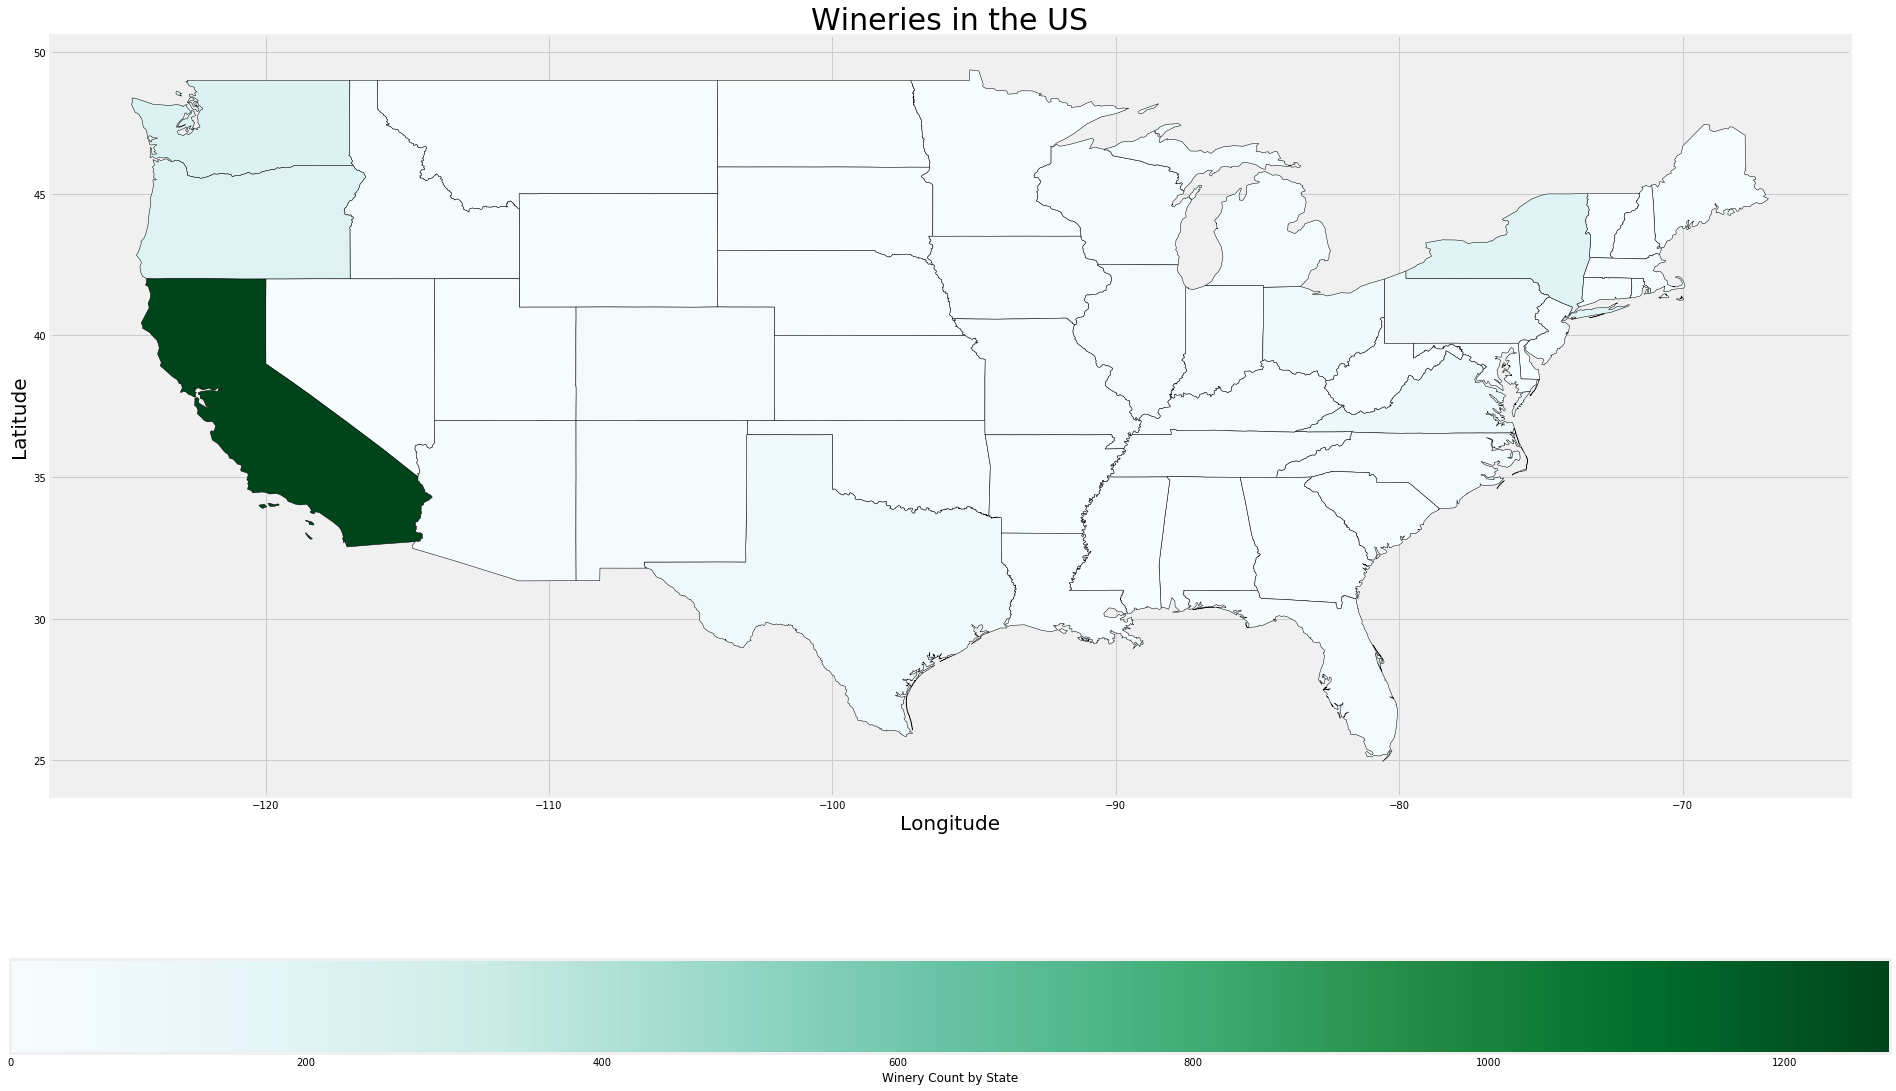

In [95]:
usa[usa['state'].isin(['Alaska','Hawaii']) == False].plot(column='winery_count',figsize=(30,20), cmap='BuGn', edgecolor='black',legend=True,legend_kwds={'label': "Winery Count by State",'orientation': "horizontal"})
plt.title('Wineries in the US',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()